In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageColor , ImageOps
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read a color image with PIL
img = Image.open("input\py.jpg")

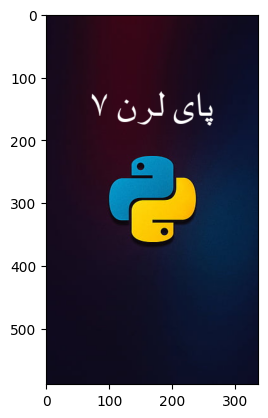

In [3]:
#adding a persian text to image

font = ImageFont.truetype("majalla.ttf", 70)
img = Image.open(img)

reshaped_text = arabic_reshaper.reshape("پای لرن ۷")   
final_text = get_display(reshaped_text)           

draw = ImageDraw.Draw(img)
draw.text(xy= (70, 100), text= final_text, fill= (255,255,255), font= font )

img.save("output2.png")
plt.imshow(img)

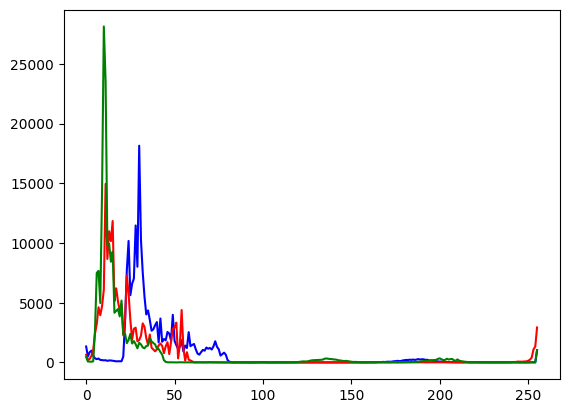

In [4]:
# Calculate 3 histograms and show with plt

colors = [ "red" , "green" , "blue"]
b = np.zeros(256)
g = np.zeros(256)
r = np.zeros(256)

pixels = img.load()
width, height = img.size
                     
for x in range(height):        
    for y in range(width): 
            value = pixels[y,x]      
            r[value[0]] = r[value[0]]+1
            g[value[1]] = g[value[1]]+1
            b[value[2]] = b[value[2]]+1

plt.plot(b , color= colors[2])
plt.plot(r , color= colors[0])
plt.plot(g , color= colors[1])


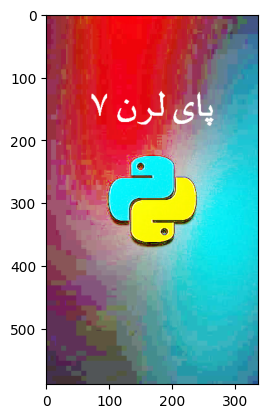

In [5]:
# Equalizes the image histogram

eq = ImageOps.equalize(img) 
plt.imshow(eq)

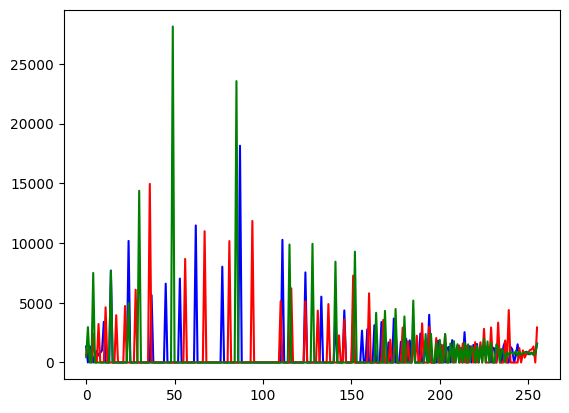

In [6]:
# Calculate equalized histograms and show with plt

colors = [ "red" , "green" , "blue"]
b = np.zeros(256)
g = np.zeros(256)
r = np.zeros(256)

pixels = eq.load()
width, height = img.size
                        
for x in range(height):        
    for y in range(width): 
            value = pixels[y,x]      
            r[value[0]] = r[value[0]]+1
            g[value[1]] = g[value[1]]+1
            b[value[2]] = b[value[2]]+1

plt.plot(b , color= colors[2])
plt.plot(r , color= colors[0])
plt.plot(g , color= colors[1])

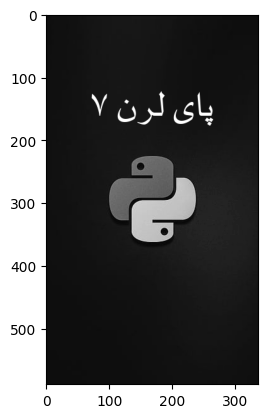

In [7]:
# Convert image to gray

gray_img = img.convert("L")
plt.imshow(gray_img, cmap='gray')


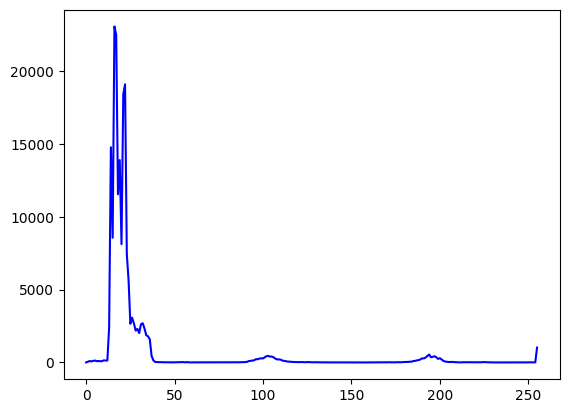

In [8]:
#Calculate histogram and show with plt

gray_scale = np.zeros(256)
gray = gray_img.load()
width, height = img.size
    
for x in range(height):        
    for y in range(width): 

        value = gray[y,x]      
        gray_scale[value] = gray_scale[value]+1


plt.plot(gray_scale , color= "blue")

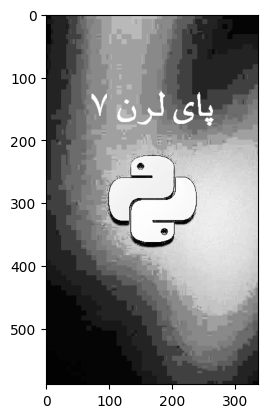

In [9]:
# Equalizes the gray image histogram

eq = ImageOps.equalize(gray_img) 
plt.imshow(eq , cmap="gray" )

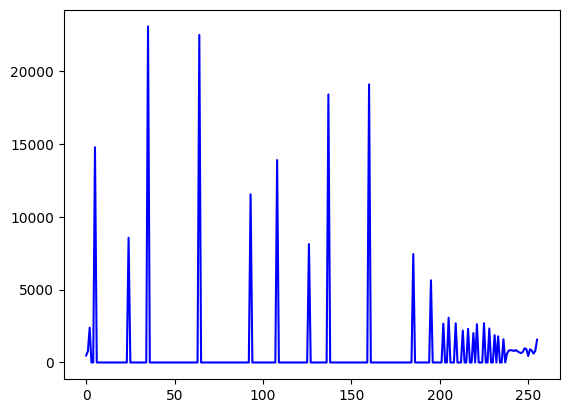

In [10]:
#Calculate histogram and show with plt

gray_scale = np.zeros(256)
gray = eq.load()
width, height = img.size
                    
for x in range(height):        
    for y in range(width): 
            value = gray[y,x]      
            gray_scale[value] = gray_scale[value]+1


plt.plot(gray_scale , color= "blue")